<a href="https://colab.research.google.com/github/muppiit/PengolahanCitra_dan_VisiKomputer/blob/main/week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas Praktikum**

In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart (Gunakan gambar lena.jpg)


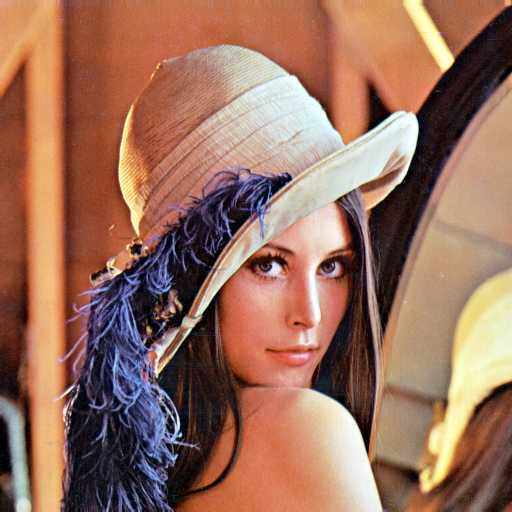

In [4]:
img = cv.imread('/content/drive/MyDrive/PCVK/Assets/lena.jpg')
cv2_imshow(img)

In [5]:
# Split into RGB channels
channels = cv.split(img)
colors = ('r', 'g', 'b')
channel_names = ['Red', 'Green', 'Blue']

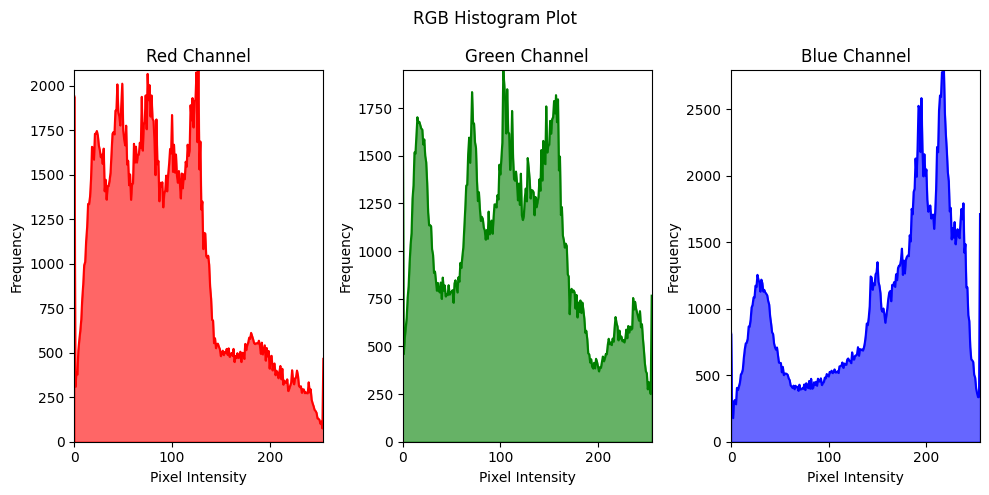

In [6]:
plt.figure(figsize=(10, 5))
for i, (channel, color) in enumerate(zip(channels, colors)):
    histogram = [0] * 256

    # Count the occurrences of each pixel intensity
    for row in channel:
        for pixel in row:
            histogram[pixel] += 1

    plt.subplot(1, 3, i + 1)
    plt.plot(histogram, color=color)
    plt.fill_between(range(256), histogram, color=color, alpha=0.6)
    plt.title(f'{channel_names[i]} Channel')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.xlim([0, 255])

    plt.ylim([0, max(histogram)])

plt.suptitle('RGB Histogram Plot')
plt.tight_layout()
plt.show()

4. buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan
hasilnya. Apakah output muncul sama?

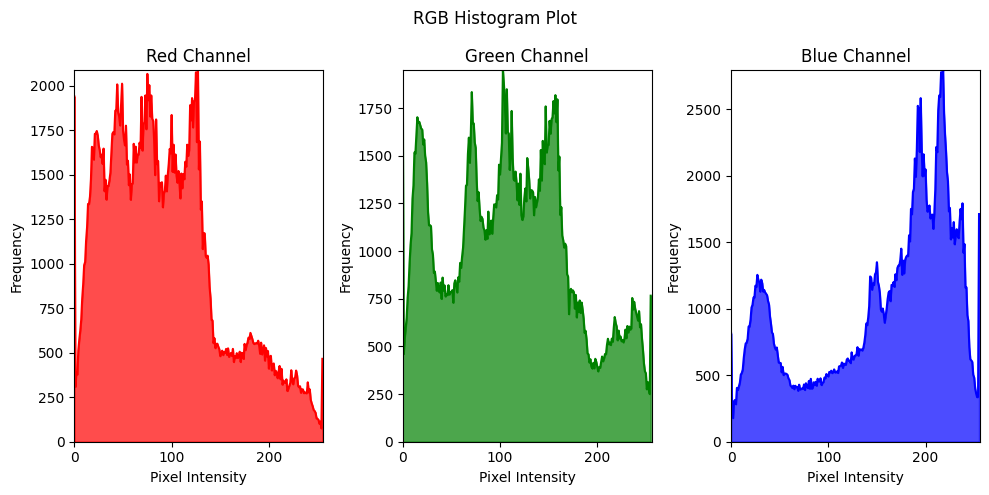

In [7]:
plt.figure(figsize=(10, 5))
for i, (channel, color) in enumerate(zip(channels, colors)):
    histogram, bin_edges = np.histogram(channel, bins=256, range=(0, 256))

    # Plot the histogram
    plt.subplot(1, 3, i + 1)
    plt.plot(bin_edges[0:-1], histogram, color=color)
    plt.fill_between(bin_edges[0:-1], histogram, color=color, alpha=0.7)
    plt.title(f'{channel_names[i]} Channel')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.xlim([0, 256])

    plt.ylim([0, max(histogram)])

plt.suptitle('RGB Histogram Plot')
plt.tight_layout()
plt.show()

5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan
gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan
flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)


In [17]:
# Fungsi untuk menghitung histogram dari setiap channel gambar
def compute_histogram(image_channel):
    hist = np.zeros(256)
    for i in range(image_channel.shape[0]):
        for j in range(image_channel.shape[1]):
            hist[image_channel[i, j]] += 1
    return hist

# Fungsi untuk menghitung cumulative distribution function
def compute_cdf(hist):
    cdf = np.cumsum(hist)
    cdf_normalized = cdf / cdf[-1]
    return cdf_normalized

# Fungsi untuk melakukan histogram equalization pada setiap channel
def histogram_equalization(image_channel):
    hist = compute_histogram(image_channel)
    cdf = compute_cdf(hist)
    cdf_normalized = np.floor(255 * cdf).astype(np.uint8)

    equalized_channel = np.zeros_like(image_channel)
    for i in range(image_channel.shape[0]):
        for j in range(image_channel.shape[1]):
            equalized_channel[i, j] = cdf_normalized[image_channel[i, j]]

    return equalized_channel

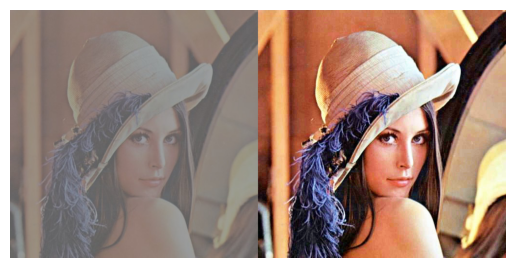

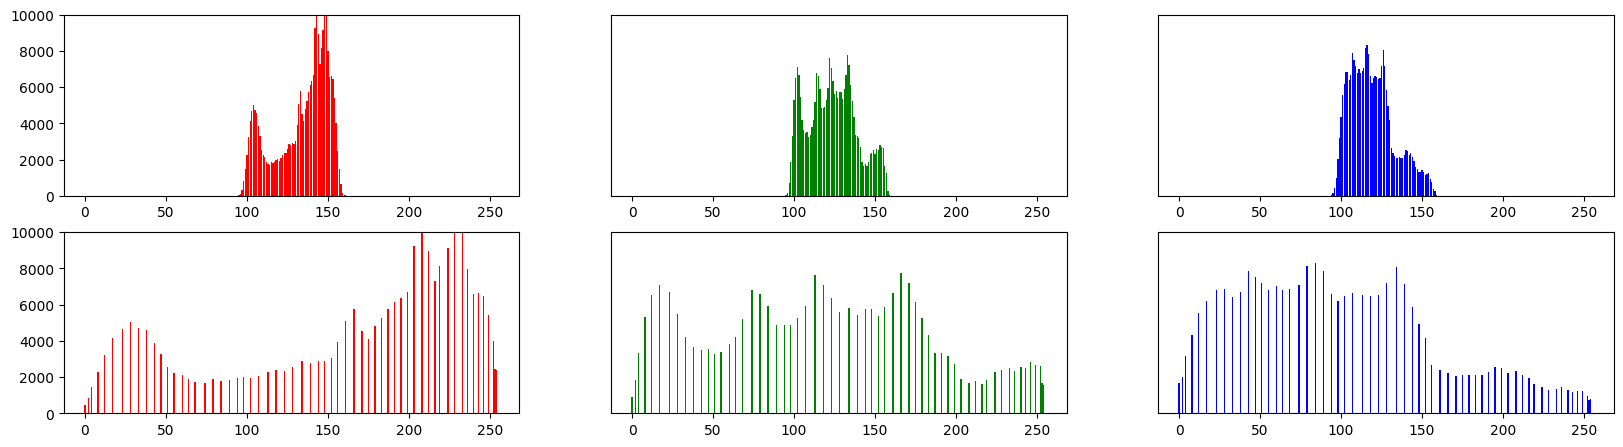

In [24]:
image = io.imread('/content/drive/MyDrive/PCVK/Assets/lena_lc.jpg')

image_hist = compute_histogram(image)

equalized_img = histogram_equalization(image)

final_frame = cv.hconcat([image, equalized_img])

plt.imshow(final_frame)
plt.axis('off')
plt.show()

# menampilkan histogram

R = image[:,:,0]
G = image[:,:,1]
B = image[:,:,2]

hist_r = compute_histogram(R)
hist_g = compute_histogram(G)
hist_b = compute_histogram(B)

channels = [hist_r, hist_g, hist_b]
colors = ['r', 'g', 'b']

plt.figure(figsize=(20, 8))

for i, channel in enumerate(channels):
    plt.subplot(3, 3, i+1)
    plt.bar(range(256), channel,color=colors[i])
    plt.ylim([0, 10000])
    if i != 0:
      plt.yticks([])

for i, channel in enumerate(channels):
    plt.subplot(3, 3, i+4)
    plt.bar(range(256), compute_histogram(equalized_img[:,:,i]),color=colors[i])
    plt.ylim([0, 10000])
    if i != 0:
      plt.yticks([])

plt.show()

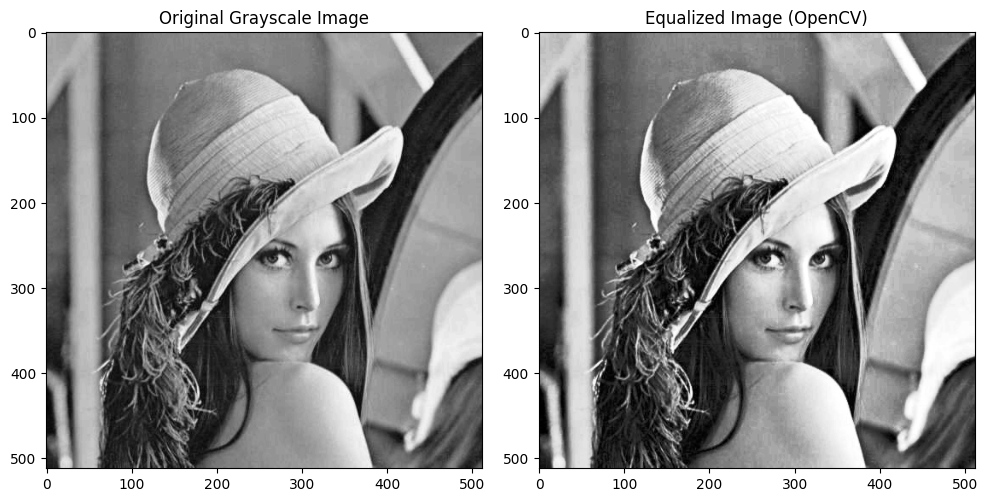

In [27]:
gray_image = cv.cvtColor(image, cv.COLOR_RGB2GRAY)

equalized_image_cv2 = cv.equalizeHist(gray_image)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display original grayscale image
axes[0].imshow(gray_image, cmap='gray')
axes[0].set_title('Original Grayscale Image')

# Display OpenCV equalized image
axes[1].imshow(equalized_image_cv2, cmap='gray')
axes[1].set_title('Equalized Image (OpenCV)')

plt.tight_layout()
plt.show()

Pada equalizeHist terlihat lebih banyak noise.

7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam,
hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart
di bawah ini! (Gunakan gambar lena.jpg)

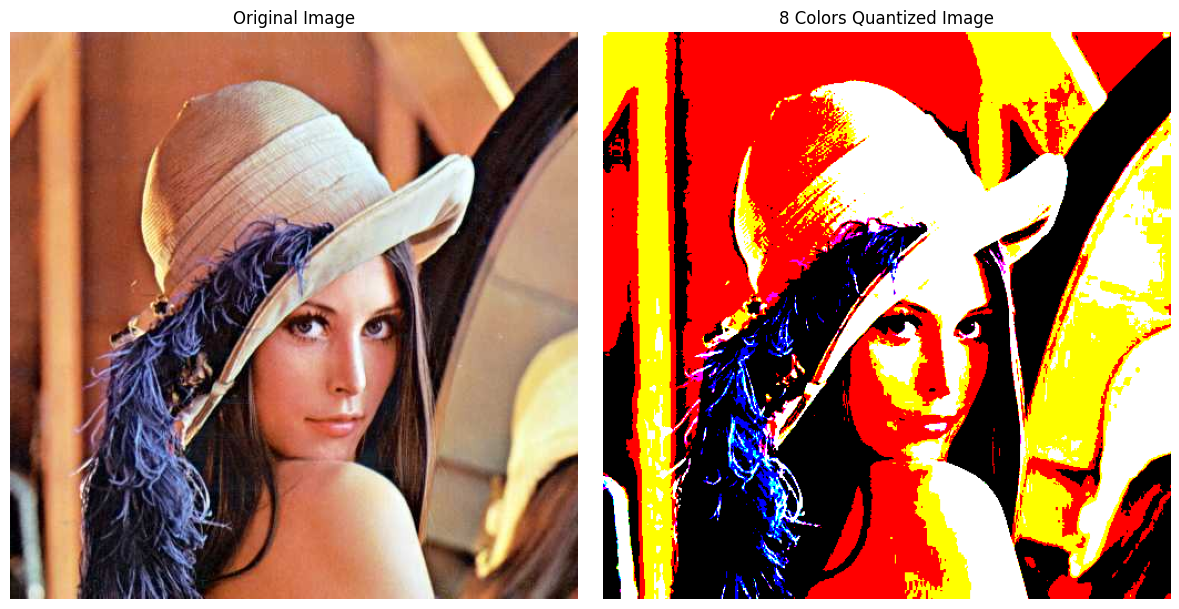

In [29]:
from PIL import Image

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
def map_color(r, g, b):
    threshold = 128
    r_bit = 1 if r > threshold else 0
    g_bit = 1 if g > threshold else 0
    b_bit = 1 if b > threshold else 0
    color_index = (r_bit << 2) | (g_bit << 1) | b_bit
    color_map = {
        0: (0, 0, 0),      # Black
        1: (0, 0, 255),    # Blue
        2: (0, 255, 0),    # Green
        3: (0, 255, 255),  # Cyan
        4: (255, 0, 0),    # Red
        5: (255, 0, 255),  # Magenta
        6: (255, 255, 0),  # Yellow
        7: (255, 255, 255) # White
    }
    return color_map[color_index]

def quantize_image(img):
    img_array = np.array(img)
    output_array = np.zeros_like(img_array)
    for i in range(img_array.shape[0]):
        for j in range(img_array.shape[1]):
            r, g, b = img_array[i, j]
            output_array[i, j] = map_color(r, g, b)
    return Image.fromarray(output_array.astype('uint8'), 'RGB')

quantized_image = quantize_image(img)

# Plotting
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

# Quantized image (8 colors)
plt.subplot(1, 2, 2)
plt.imshow(quantized_image)
plt.title('8 Colors Quantized Image')
plt.axis('off')

plt.tight_layout()
plt.show()

9. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image
awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman
modul ini! (Gunakan gambar lena.jpg)

In [48]:
def threshold(value):
  np.clip(value, 0, 255, out=value)
  return value

def floyd_steinberg_dithering(image):
    """Fungsi untuk menerapkan algoritma Floyd-Steinberg Dithering pada gambar RGB."""
    # Ambil ukuran gambar
    height, width, _ = image.shape

    # Buat salinan dari gambar asli untuk hasil dithering
    img_dithered = image.copy().astype(np.float32)

    # Looping untuk setiap piksel pada gambar
    for y in range(height - 1):
        for x in range(1, width - 1):
            # Simpan nilai pixel lama
            pixel_old = img_dithered[y, x].copy()

            # Hitung jarak pixel
            jarak_pixel = 1  # Tetapkan jarak minimal 1

            # Hitung pixel baru berdasarkan dithering (membulatkan nilai)
            pixel_new = np.round(jarak_pixel * pixel_old / 255.0) * (255 / jarak_pixel)
            img_dithered[y, x] = pixel_new

            # Hitung error antara nilai pixel lama dan baru
            error = pixel_old - pixel_new

            # Sebarkan error ke pixel tetangga menggunakan Floyd-Steinberg coefficients
            img_dithered[y, x+1] += error * 7/16
            img_dithered[y+1, x-1] += error * 3/16
            img_dithered[y+1, x] += error * 5/16
            img_dithered[y+1, x+1] += error * 1/16

            # Terapkan threshold pada tetangga setelah ditambah error
            img_dithered[y, x+1] = threshold(img_dithered[y, x+1])
            img_dithered[y+1, x-1] = threshold(img_dithered[y+1, x-1])
            img_dithered[y+1, x] = threshold(img_dithered[y+1, x])
            img_dithered[y+1, x+1] = threshold(img_dithered[y+1, x+1])

    # Kembalikan hasil dithering dalam bentuk uint8
    return img_dithered.astype(np.uint8)

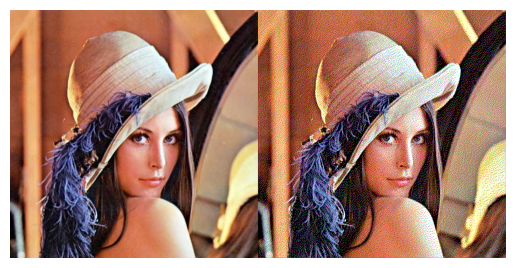

In [36]:
img = io.imread('/content/drive/MyDrive/PCVK/Assets/lena.jpg')

img_dithered = floyd_steinberg_dithering(img)

final_frame = cv.hconcat([img, img_dithered])

plt.imshow(final_frame)
plt.axis('off')
plt.show()

9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram
equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil
histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga
menampilkan gambar di bawah ini!


In [43]:
def grayscale_luminance(image):
    gray_image = np.zeros_like(image)
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            gray_image[y, x] = np.dot(image[y, x, :], [0.299, 0.587, 0.114])

    return gray_image.astype(np.uint8)

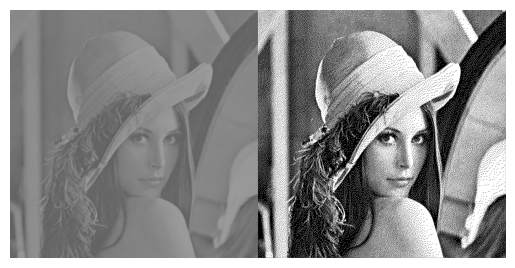

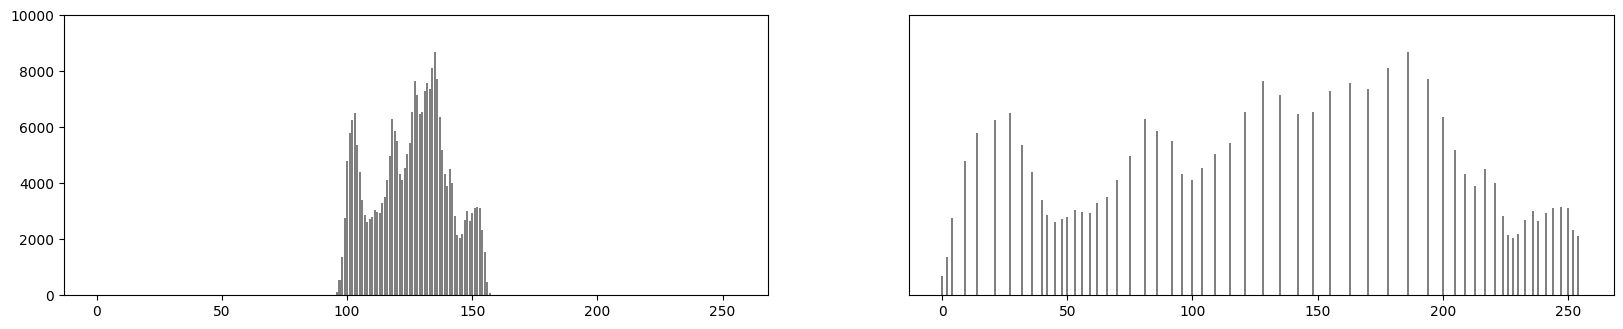

In [49]:
lena_lc = io.imread('/content/drive/MyDrive/PCVK/Assets/lena_lc.jpg')
# Ubah ke grayscale
gray_image = grayscale_luminance(lena_lc.copy())

# Terapkan histogram equalization
equalized_img = histogram_equalization(gray_image)

# Terapkan dithering Floyd-Steinberg
img_dithered = floyd_steinberg_dithering(equalized_img)

# Gabungkan gambar asli, hasil histogram equalization, dan hasil dithering
final_frame = cv.hconcat([gray_image, img_dithered])

plt.imshow(final_frame, cmap='gray')
plt.axis('off')
plt.show()

# Menampilkan Histogram Grayscale plot

plt.figure(figsize=(20, 8))

images = np.array([gray_image,equalized_img])

for i, image in enumerate(images):
    plt.subplot(2, 2, i+1)
    plt.bar(range(256), compute_histogram(image[:,:,0]), color='gray')
    plt.ylim([0, 10000])
    if i != 0:
      plt.yticks([])

plt.show()